# Nasa Hiring Rate Final Code

In [257]:
# Import packages 
import pandas as pd
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
from scipy.stats import ttest_ind
from statsmodels.stats.proportion import proportions_ztest
from scipy.stats import norm

### Data Wrangling

In [258]:
# Import datasets
dataframe1= pd.read_excel("Data/nasa.xlsx")
dataframe2=pd.read_csv("Data/astronauts.csv")
dataframe3=pd.read_excel("Data/Female and Male Astronauts Accepted in the NASA Program.xlsx")
dataframe4=pd.read_csv("Data/International Astronaut Database.csv")


### Data Key 
#### ID - idnetifiable variable for each applicant
#### DOB - Date of Birth
#### NASA - Did applicant have previous NASA experience?
#### Military - Did applicant have previous Military experience?
#### Interviewed - Met basic qualifications MBQ, but not interviewed
#### Selected - selected or not to be astronauts
#### Status - MBQ Rejected at Interview, MBQ only, and Selected 

### View data sets

In [259]:
dataframe1.head()

,ID,DOB,Education,NASA,Military,Race,Gender,Interviewed,Selected,Status,rando,insamp,Announcement Date,Age
0,20090000,1984-11-22,4,No,No,Caucasian,Male,MBQ not interviewed,NaN,MBQ only,0.176464,0,2009-06-29,24.599589
1,20090001,1984-07-16,6,No,No,Caucasian,Male,MBQ not interviewed,NaN,MBQ only,0.760009,0,2009-06-29,24.952772
2,20090002,1984-02-09,4,No,No,Asian/Pacific Islander,Male,MBQ not interviewed,NaN,MBQ only,0.653344,0,2009-06-29,25.385352
3,20090003,1984-02-01,8,No,No,Asian/Pacific Islander,Male,MBQ not interviewed,NaN,MBQ only,0.510478,0,2009-06-29,25.407255
4,20090004,1984-01-20,4,No,No,Caucasian,Female,MBQ not interviewed,NaN,MBQ only,0.449820,0,2009-06-29,25.440110


In [260]:
dataframe2=pd.DataFrame(dataframe2)

In [261]:
dataframe2.head()

,Name,Year,Group,Status,Birth Date,Birth Place,Gender,Alma Mater,Undergraduate Major,Graduate Major,Military Rank,Military Branch,Space Flights,Space Flight (hr),Space Walks,Space Walks (hr),Missions,Death Date,Death Mission
0,Joseph M. Acaba,2004.0,19.0,Active,5/17/1967,"Inglewood, CA",Male,University of California-Santa Barbara; Univer...,Geology,Geology,NaN,NaN,2,3307,2,13.0,"STS-119 (Discovery), ISS-31/32 (Soyuz)",NaN,NaN
1,Loren W. Acton,NaN,NaN,Retired,3/7/1936,"Lewiston, MT",Male,Montana State University; University of Colorado,Engineering Physics,Solar Physics,NaN,NaN,1,190,0,0.0,STS 51-F (Challenger),NaN,NaN
2,James C. Adamson,1984.0,10.0,Retired,3/3/1946,"Warsaw, NY",Male,US Military Academy; Princeton University,Engineering,Aerospace Engineering,Colonel,US Army (Retired),2,334,0,0.0,"STS-28 (Columbia), STS-43 (Atlantis)",NaN,NaN
3,Thomas D. Akers,1987.0,12.0,Retired,5/20/1951,"St. Louis, MO",Male,University of Missouri-Rolla,Applied Mathematics,Applied Mathematics,Colonel,US Air Force (Retired),4,814,4,29.0,"STS-41 (Discovery), STS-49 (Endeavor), STS-61 ...",NaN,NaN
4,Buzz Aldrin,1963.0,3.0,Retired,1/20/1930,"Montclair, NJ",Male,US Military Academy; MIT,Mechanical Engineering,Astronautics,Colonel,US Air Force (Retired),2,289,2,8.0,"Gemini 12, Apollo 11",NaN,NaN


In [262]:
dataframe3.head()

,ID,Cohort,Year,Males Accepted in NASA Program,Females Accepted in NASA Program
0,NaN,1,1959,100,0
1,NaN,2,1962,100,0
2,NaN,3,1963,100,0
3,NaN,4,1965,100,0
4,NaN,5,1966,100,0


In [263]:
dataframe4.head()

,Name,Country,Gender,Flights,Total Flights,Total Flight Time (ddd:hh:mm)
0,Abdul Ahad Mohmand,Afghanistan,Man,Soyuz TM-6 (1988),1,008:20:26
1,Akihiko Hoshide,Japan,Man,"STS-124 (2008), Soyuz TMA-05M (2012), SpaceX C...",3,524:08:27
2,Alan Bean,United States,Man,"Apollo 12 (1969), Skylab 3 (1973)",2,069:15:45
3,Alan G. Poindexter,United States,Man,"STS-122 (2008), STS-131 (2010)",2,027:21:09
4,Alan Shepard,United States,Man,"Mercury-Redstone 3 (1961), Apollo 14 (1971)",2,009:00:17


In [264]:
dataframe1=pd.DataFrame(dataframe1)
dataframe3=pd.DataFrame(dataframe3)

### Remove extra columns to be able to combine into consolidated data frame 

In [265]:
dataframe1=dataframe1.drop(columns=['ID','DOB','Education','rando','Announcement Date','Age','insamp'])


In [266]:
## convert 
def recode (Space_Flights):
    if Space_Flights >= 1:
        return 1
    if Space_Flights == 0:
        return 0
dataframe2['Space Flights R'] = dataframe2['Space Flights'].apply(recode)
dataframe2.head()

,Name,Year,Group,Status,Birth Date,Birth Place,Gender,Alma Mater,Undergraduate Major,Graduate Major,Military Rank,Military Branch,Space Flights,Space Flight (hr),Space Walks,Space Walks (hr),Missions,Death Date,Death Mission,Space Flights R
0,Joseph M. Acaba,2004.0,19.0,Active,5/17/1967,"Inglewood, CA",Male,University of California-Santa Barbara; Univer...,Geology,Geology,NaN,NaN,2,3307,2,13.0,"STS-119 (Discovery), ISS-31/32 (Soyuz)",NaN,NaN,1
1,Loren W. Acton,NaN,NaN,Retired,3/7/1936,"Lewiston, MT",Male,Montana State University; University of Colorado,Engineering Physics,Solar Physics,NaN,NaN,1,190,0,0.0,STS 51-F (Challenger),NaN,NaN,1
2,James C. Adamson,1984.0,10.0,Retired,3/3/1946,"Warsaw, NY",Male,US Military Academy; Princeton University,Engineering,Aerospace Engineering,Colonel,US Army (Retired),2,334,0,0.0,"STS-28 (Columbia), STS-43 (Atlantis)",NaN,NaN,1
3,Thomas D. Akers,1987.0,12.0,Retired,5/20/1951,"St. Louis, MO",Male,University of Missouri-Rolla,Applied Mathematics,Applied Mathematics,Colonel,US Air Force (Retired),4,814,4,29.0,"STS-41 (Discovery), STS-49 (Endeavor), STS-61 ...",NaN,NaN,1
4,Buzz Aldrin,1963.0,3.0,Retired,1/20/1930,"Montclair, NJ",Male,US Military Academy; MIT,Mechanical Engineering,Astronautics,Colonel,US Air Force (Retired),2,289,2,8.0,"Gemini 12, Apollo 11",NaN,NaN,1


In [267]:
print(dataframe3.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 5 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   ID                                 0 non-null      float64
 1   Cohort                             27 non-null     int64  
 2   Year                               27 non-null     int64  
 3   Males Accepted in NASA Program     27 non-null     int64  
 4   Females Accepted in NASA Program   27 non-null     int64  
dtypes: float64(1), int64(4)
memory usage: 1.2 KB
None


In [268]:
dataframe2=dataframe2.drop(columns=['Group','Year','Space Walks (hr)'])

In [269]:
NasaData=pd.merge(dataframe1,dataframe2, on='Gender')

In [270]:
NasaData.head()

,NASA,Military,Race,Gender,Interviewed,Selected,Status_x,Name,Status_y,Birth Date,...,Graduate Major,Military Rank,Military Branch,Space Flights,Space Flight (hr),Space Walks,Missions,Death Date,Death Mission,Space Flights R
0,No,No,Caucasian,Male,MBQ not interviewed,NaN,MBQ only,Joseph M. Acaba,Active,5/17/1967,...,Geology,NaN,NaN,2,3307,2,"STS-119 (Discovery), ISS-31/32 (Soyuz)",NaN,NaN,1
1,No,No,Caucasian,Male,MBQ not interviewed,NaN,MBQ only,Loren W. Acton,Retired,3/7/1936,...,Solar Physics,NaN,NaN,1,190,0,STS 51-F (Challenger),NaN,NaN,1
2,No,No,Caucasian,Male,MBQ not interviewed,NaN,MBQ only,James C. Adamson,Retired,3/3/1946,...,Aerospace Engineering,Colonel,US Army (Retired),2,334,0,"STS-28 (Columbia), STS-43 (Atlantis)",NaN,NaN,1
3,No,No,Caucasian,Male,MBQ not interviewed,NaN,MBQ only,Thomas D. Akers,Retired,5/20/1951,...,Applied Mathematics,Colonel,US Air Force (Retired),4,814,4,"STS-41 (Discovery), STS-49 (Endeavor), STS-61 ...",NaN,NaN,1
4,No,No,Caucasian,Male,MBQ not interviewed,NaN,MBQ only,Buzz Aldrin,Retired,1/20/1930,...,Astronautics,Colonel,US Air Force (Retired),2,289,2,"Gemini 12, Apollo 11",NaN,NaN,1


In [271]:
def recode (Gender):
    if Gender == "Male":
        return 1
    if Gender == "Female":
        return 0
NasaData['GenderR'] = NasaData['Gender'].apply(recode)

In [272]:
def recode (Military):
    if Military == "No":
        return False
    if Military == "Yes":
        return True
NasaData['MilitaryR'] = NasaData['Military'].apply(recode)

In [273]:
NasaData.head()

,NASA,Military,Race,Gender,Interviewed,Selected,Status_x,Name,Status_y,Birth Date,...,Military Branch,Space Flights,Space Flight (hr),Space Walks,Missions,Death Date,Death Mission,Space Flights R,GenderR,MilitaryR
0,No,No,Caucasian,Male,MBQ not interviewed,NaN,MBQ only,Joseph M. Acaba,Active,5/17/1967,...,NaN,2,3307,2,"STS-119 (Discovery), ISS-31/32 (Soyuz)",NaN,NaN,1,1,False
1,No,No,Caucasian,Male,MBQ not interviewed,NaN,MBQ only,Loren W. Acton,Retired,3/7/1936,...,NaN,1,190,0,STS 51-F (Challenger),NaN,NaN,1,1,False
2,No,No,Caucasian,Male,MBQ not interviewed,NaN,MBQ only,James C. Adamson,Retired,3/3/1946,...,US Army (Retired),2,334,0,"STS-28 (Columbia), STS-43 (Atlantis)",NaN,NaN,1,1,False
3,No,No,Caucasian,Male,MBQ not interviewed,NaN,MBQ only,Thomas D. Akers,Retired,5/20/1951,...,US Air Force (Retired),4,814,4,"STS-41 (Discovery), STS-49 (Endeavor), STS-61 ...",NaN,NaN,1,1,False
4,No,No,Caucasian,Male,MBQ not interviewed,NaN,MBQ only,Buzz Aldrin,Retired,1/20/1930,...,US Air Force (Retired),2,289,2,"Gemini 12, Apollo 11",NaN,NaN,1,1,False


In [274]:
NasaData.columns

Index(['NASA', 'Military', 'Race', 'Gender', 'Interviewed', 'Selected',
       'Status_x', 'Name', 'Status_y', 'Birth Date', 'Birth Place',
       'Alma Mater', 'Undergraduate Major', 'Graduate Major', 'Military Rank',
       'Military Branch', 'Space Flights', 'Space Flight (hr)', 'Space Walks',
       'Missions', 'Death Date', 'Death Mission', 'Space Flights R', 'GenderR',
       'MilitaryR'],
      dtype='object')

### Delete unwanted columns

In [275]:
NasaData=NasaData.drop(columns=['Graduate Major','Birth Date','Interviewed', 'Selected',
       'Status_x','Status_y', 'Birth Date', 'Birth Place',
       'Alma Mater', 'Undergraduate Major', 'Graduate Major', 'Military Rank',
       'Military Branch','Death Date', 'Death Mission'])

In [276]:
NasaData.head()

,NASA,Military,Race,Gender,Name,Space Flights,Space Flight (hr),Space Walks,Missions,Space Flights R,GenderR,MilitaryR
0,No,No,Caucasian,Male,Joseph M. Acaba,2,3307,2,"STS-119 (Discovery), ISS-31/32 (Soyuz)",1,1,False
1,No,No,Caucasian,Male,Loren W. Acton,1,190,0,STS 51-F (Challenger),1,1,False
2,No,No,Caucasian,Male,James C. Adamson,2,334,0,"STS-28 (Columbia), STS-43 (Atlantis)",1,1,False
3,No,No,Caucasian,Male,Thomas D. Akers,4,814,4,"STS-41 (Discovery), STS-49 (Endeavor), STS-61 ...",1,1,False
4,No,No,Caucasian,Male,Buzz Aldrin,2,289,2,"Gemini 12, Apollo 11",1,1,False


### Check for NA's

In [277]:
NasaData.isna().sum()

NASA                     0
Military                 0
Race                 32985
Gender                   0
Name                     0
Space Flights            0
Space Flight (hr)        0
Space Walks              0
Missions             44709
Space Flights R          0
GenderR                  0
MilitaryR                0
dtype: int64

In [278]:
NasaData.to_csv("Data/NasaData.csv", index=False)

In [279]:
# Counting Males and Females in the column count
dataframe3["count"]=dataframe3['Males Accepted in NASA Program ']+dataframe3['Females Accepted in NASA Program ']

In [280]:
dataframe3.head()

,ID,Cohort,Year,Males Accepted in NASA Program,Females Accepted in NASA Program,count
0,NaN,1,1959,100,0,100
1,NaN,2,1962,100,0,100
2,NaN,3,1963,100,0,100
3,NaN,4,1965,100,0,100
4,NaN,5,1966,100,0,100


In [281]:
# Creating a new dataframe before the year 2017
newdataframe=dataframe3[dataframe3["Year"]<=2017]

In [282]:
# Creating a new dataframe after the year 1990
newdataframe=newdataframe[newdataframe["Year"]>=1990]
newdataframe.head()

,ID,Cohort,Year,Males Accepted in NASA Program,Females Accepted in NASA Program,count
12,NaN,13,1990,78,22,100
13,NaN,14,1992,84,16,100
14,NaN,15,1995,74,26,100
15,NaN,16,1996,77,23,100
16,NaN,17,1998,88,12,100


# Exploratory analysis

/Users/rachaelreich/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='GenderR', ylabel='Density'>

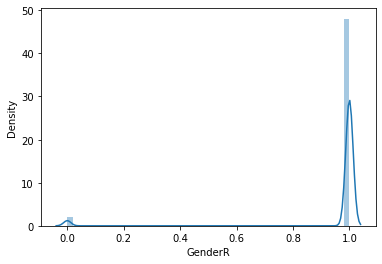

In [283]:
sns.distplot(NasaData['GenderR'])

Text(0.5, 1.0, 'Females Accepted in NASA Program histogram')

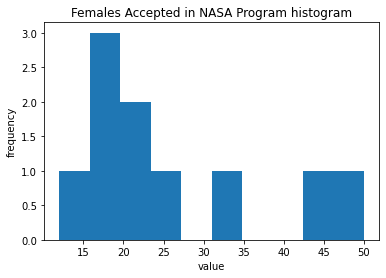

In [284]:
# Histogram plot for Females Accepted in NASA Program
import matplotlib.pyplot as plt
plt.hist(newdataframe['Females Accepted in NASA Program '])
plt.xlabel("value")
plt.ylabel("frequency")
plt.title("Females Accepted in NASA Program histogram")

Text(0.5, 1.0, 'Males Accepted in NASA Program histogram')

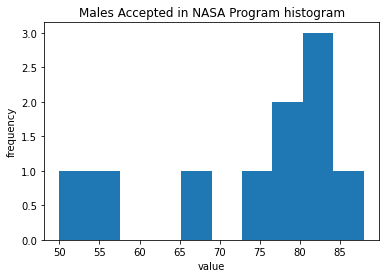

In [285]:
# Histogram plot for Males Accepted in NASA Program
plt.hist(newdataframe['Males Accepted in NASA Program '])
plt.xlabel("value")
plt.ylabel("frequency")
plt.title("Males Accepted in NASA Program histogram")

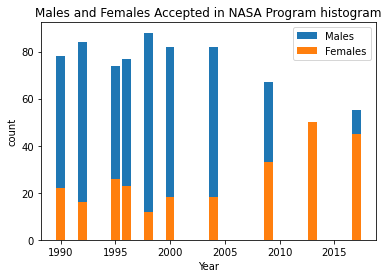

In [286]:
# Bar plot for the the Males and Females Accepted in the NASA Program 
plt.bar(newdataframe['Year'],newdataframe['Males Accepted in NASA Program '],label="Males")
plt.bar(newdataframe['Year'],newdataframe['Females Accepted in NASA Program '],label="Females")
plt.xlabel("Year")
plt.ylabel("count")
plt.title("Males and Females Accepted in NASA Program histogram")
plt.legend()

## Do space flight hours differ between males and females? (Independent t-test)

<AxesSubplot:>

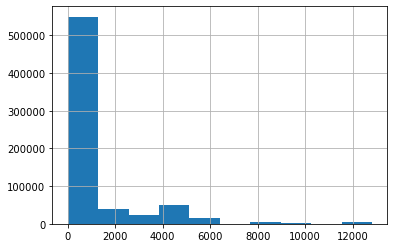

In [287]:
NasaData['Space Flight (hr)'][NasaData['Gender']== 'Male'].hist()

<AxesSubplot:xlabel='Space Flight (hr)', ylabel='Count'>

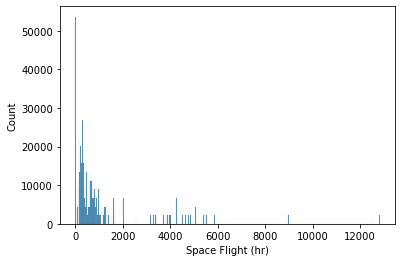

In [288]:
sns.histplot(NasaData['Space Flight (hr)'][NasaData['Gender']== 'Male'])

In [289]:
NasaData['Space Flight (hr)SQRT'] = np.sqrt(NasaData['Space Flight (hr)'])

<AxesSubplot:>

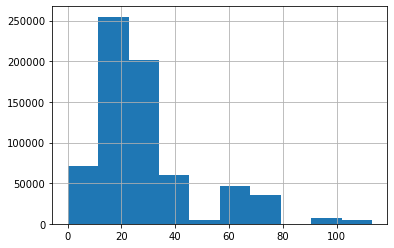

In [290]:
NasaData['Space Flight (hr)SQRT'][NasaData['Gender']== 'Male'].hist()

<AxesSubplot:>

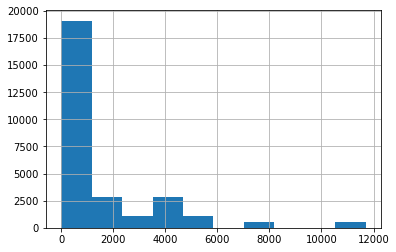

In [291]:
NasaData['Space Flight (hr)'][NasaData['Gender']== 'Female'].hist()

<AxesSubplot:>

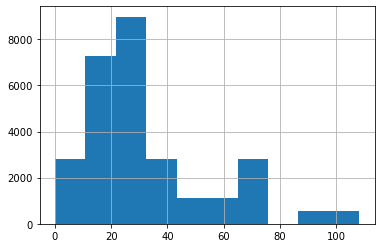

In [292]:
NasaData['Space Flight (hr)SQRT'][NasaData['Gender']== 'Female'].hist()

In [293]:
ttest_ind(NasaData['Space Flight (hr)SQRT'][NasaData['Gender']== 'Male'],NasaData['Space Flight (hr)SQRT'][NasaData['Gender']== 'Female'])

Ttest_indResult(statistic=-33.397001497696905, pvalue=2.3432743505986788e-244)

In [294]:
NasaData['Space Flight (hr)'][NasaData['Gender']== 'Male'].mean()

1195.8403908794787

In [295]:
NasaData['Space Flight (hr)'][NasaData['Gender']== 'Female'].mean()

1577.3

### There is a significance in the space flight time between males and females, females have more space flight time.

### Do space flight hours differ between hispanics and caucasians? (Independent t-test)

<AxesSubplot:>

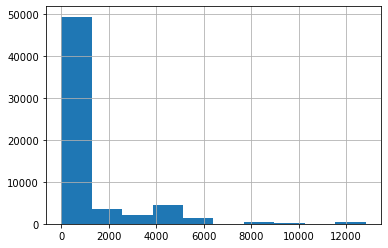

In [296]:
NasaData['Space Flight (hr)'][NasaData['Race']== 'Hispanic'].hist()

<AxesSubplot:>

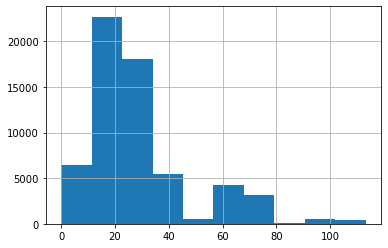

In [297]:
NasaData['Space Flight (hr)SQRT'][NasaData['Race']== 'Hispanic'].hist()

<AxesSubplot:>

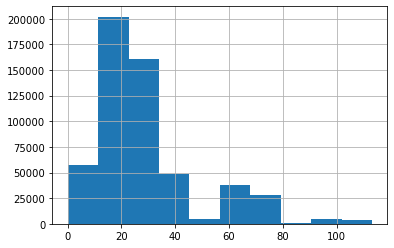

In [298]:
NasaData['Space Flight (hr)SQRT'][NasaData['Race']== 'Caucasian'].hist()

In [299]:
ttest_ind(NasaData['Space Flight (hr)SQRT'][NasaData['Race']== 'Hispanic'],NasaData['Space Flight (hr)SQRT'][NasaData['Race']== 'Caucasian'])

Ttest_indResult(statistic=0.00073729398427902, pvalue=0.9994117248072004)

### Does the number of space flights differ between males and females 

<AxesSubplot:>

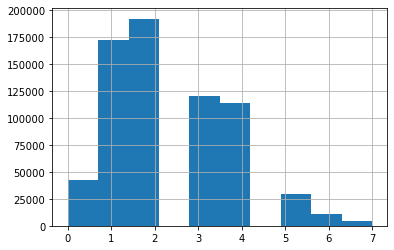

In [300]:
NasaData['Space Flights'][NasaData['Gender']== 'Male'].hist()

In [301]:
NasaData['Space FlightsSQRT'] = np.sqrt(NasaData['Space Flights'])

<AxesSubplot:>

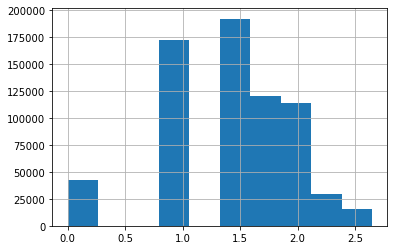

In [302]:
NasaData['Space FlightsSQRT'][NasaData['Gender']== 'Male'].hist()

<AxesSubplot:>

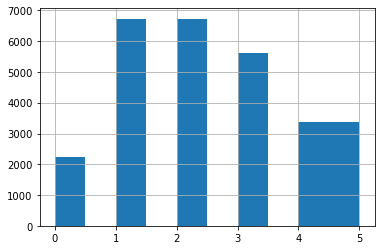

In [303]:
NasaData['Space Flights'][NasaData['Gender']== 'Female'].hist()

<AxesSubplot:>

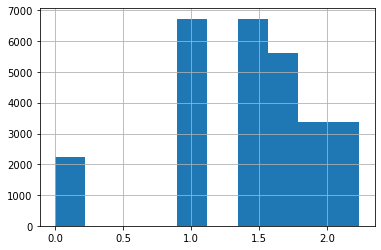

In [304]:
NasaData['Space FlightsSQRT'][NasaData['Gender']== 'Female'].hist()

In [305]:
ttest_ind(NasaData['Space FlightsSQRT'][NasaData['Gender']== 'Male'],NasaData['Space FlightsSQRT'][NasaData['Gender']== 'Female'])

Ttest_indResult(statistic=0.4665781874543454, pvalue=0.6408018382181488)

### Do the number of space walks differ between males and females? (Independent t-test)

<AxesSubplot:>

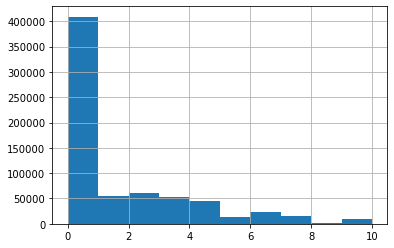

In [306]:
NasaData['Space Walks'][NasaData['Gender']== 'Male'].hist()

In [307]:
NasaData['Space WalksSQRT'] = np.sqrt(NasaData['Space Walks'])

<AxesSubplot:>

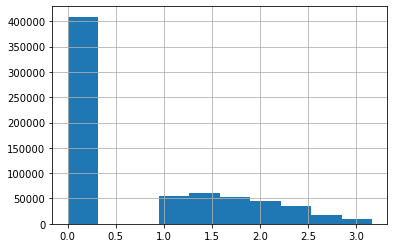

In [308]:
NasaData['Space WalksSQRT'][NasaData['Gender']== 'Male'].hist()

<AxesSubplot:>

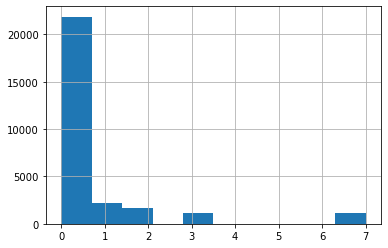

In [309]:
NasaData['Space Walks'][NasaData['Gender']== 'Female'].hist()

<AxesSubplot:>

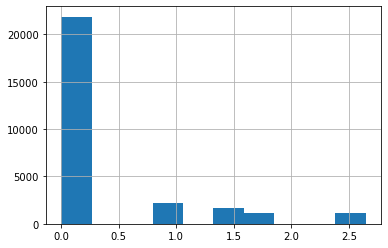

In [310]:
NasaData['Space WalksSQRT'][NasaData['Gender']== 'Female'].hist()

In [311]:
ttest_ind(NasaData['Space WalksSQRT'][NasaData['Gender']== 'Male'],NasaData['Space WalksSQRT'][NasaData['Gender']== 'Female'])

Ttest_indResult(statistic=65.17777872446923, pvalue=0.0)

In [312]:
NasaData['Space Walks'][NasaData['Gender']== 'Male'].mean()

1.3517915309446253

In [313]:
NasaData['Space Walks'][NasaData['Gender']== 'Female'].mean()

0.6

### There is a significant difference, males have been on more space walks than females.

In [314]:
stats.ttest_1samp(NasaData['GenderR'],1)

Ttest_1sampResult(statistic=-170.87029923589571, pvalue=0.0)

### this is significant as p < .05

## correlation matrix

In [315]:
NasaData.corr(method='pearson').style.format("{:.2}").background_gradient(cmap=plt.get_cmap('coolwarm'), axis=1)

,Space Flights,Space Flight (hr),Space Walks,Space Flights R,GenderR,MilitaryR,Space Flight (hr)SQRT,Space FlightsSQRT,Space WalksSQRT
Space Flights,1.0,0.33,0.28,0.43,-0.0057,-0.00027,0.5,0.95,0.24
Space Flight (hr),0.33,1.0,0.46,0.17,-0.04,-0.0019,0.94,0.33,0.47
Space Walks,0.28,0.46,1.0,0.16,0.07,0.0033,0.51,0.28,0.96
Space Flights R,0.43,0.17,0.16,1.0,0.015,0.0007,0.36,0.68,0.19
GenderR,-0.0057,-0.04,0.07,0.015,1.0,0.048,-0.039,0.00055,0.077
MilitaryR,-0.00027,-0.0019,0.0033,0.0007,0.048,1.0,-0.0019,2.7e-05,0.0037
Space Flight (hr)SQRT,0.5,0.94,0.51,0.36,-0.039,-0.0019,1.0,0.53,0.52
Space FlightsSQRT,0.95,0.33,0.28,0.68,0.00055,2.7e-05,0.53,1.0,0.27
Space WalksSQRT,0.24,0.47,0.96,0.19,0.077,0.0037,0.52,0.27,1.0
